# WIP: Sales Forecasting

## Introduction

## Approach

## The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('data/store-sales-time-series-forecasting/train.csv')
train.date = pd.to_datetime(train.date)
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [31]:
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [45]:
train.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

Text(0, 0.5, '# items on promotion')

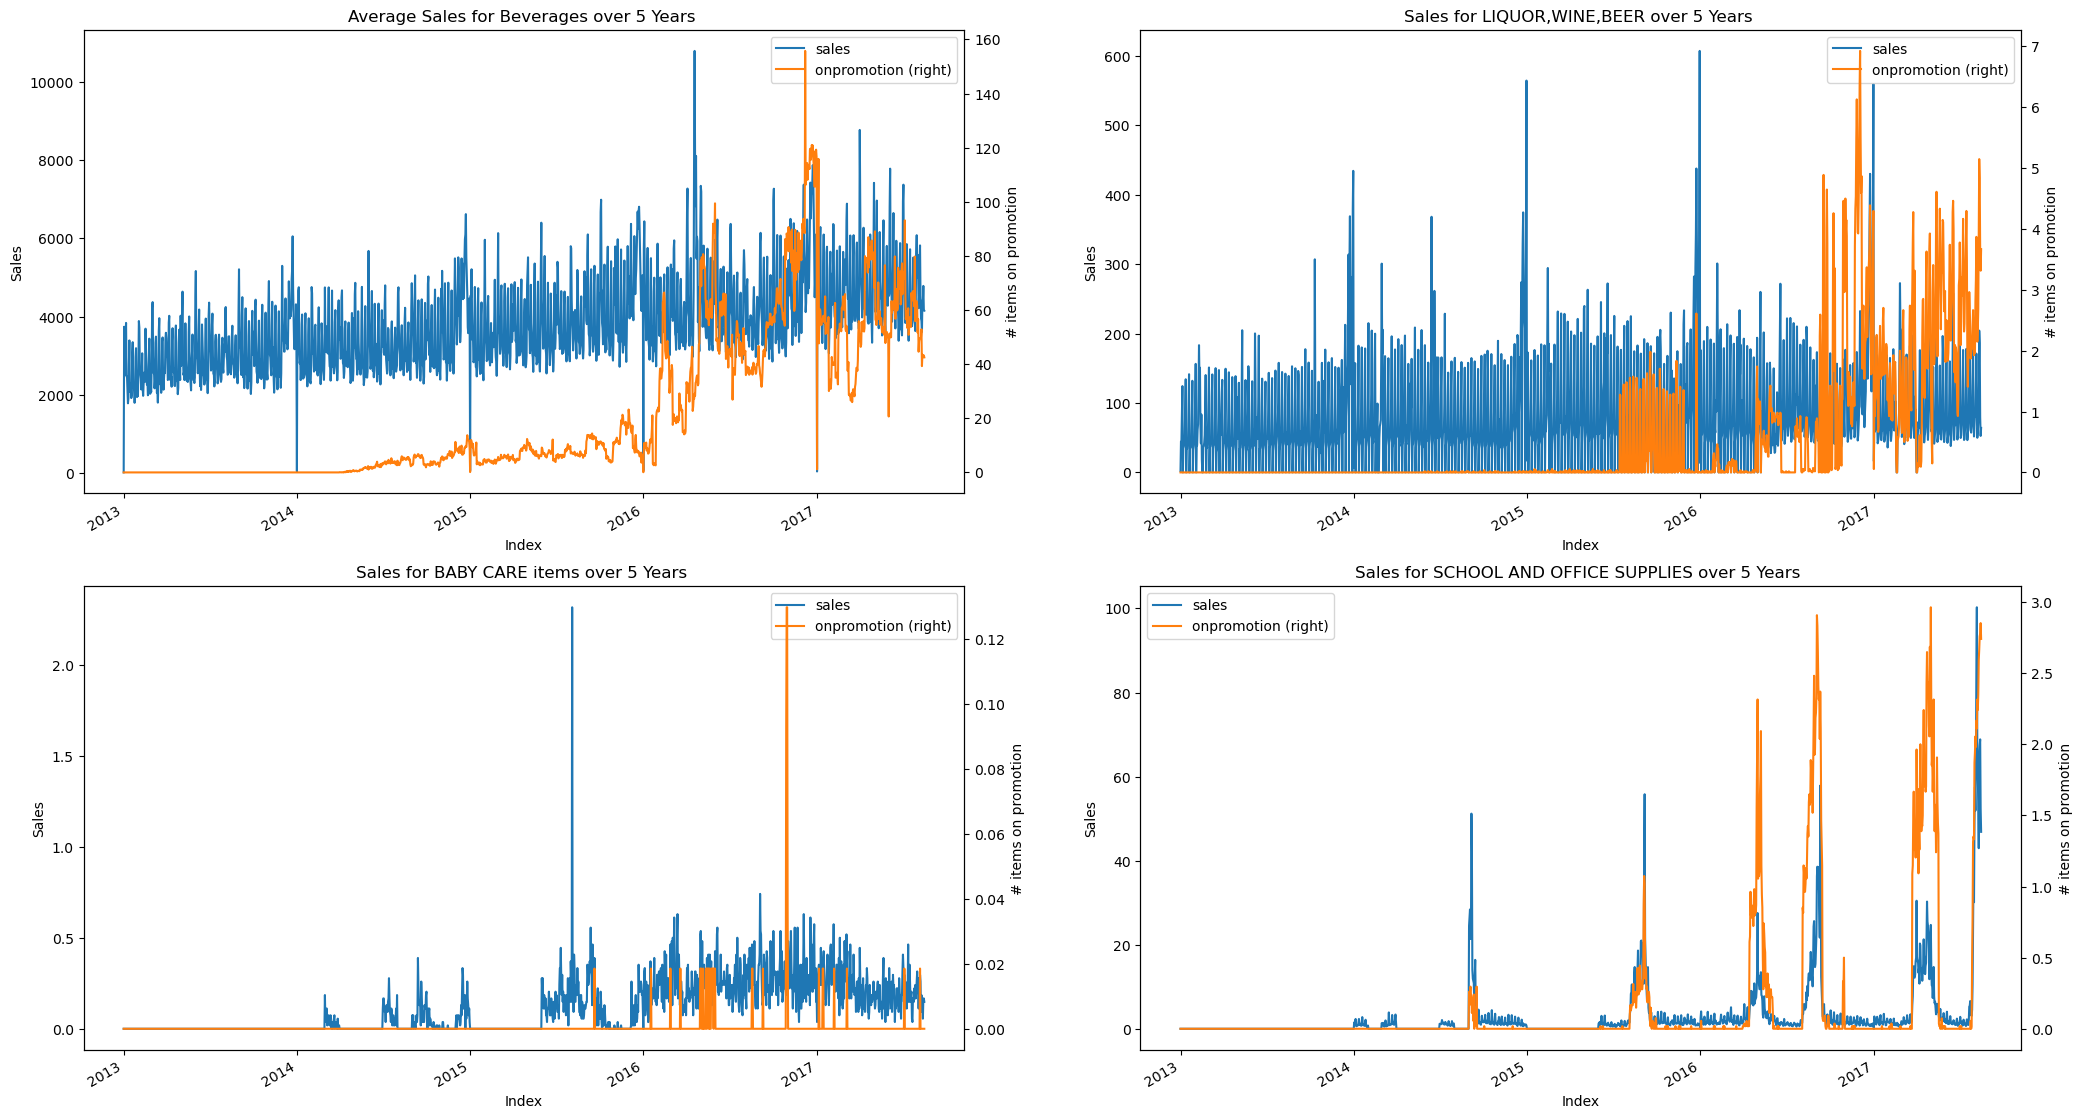

In [44]:
fig, ax = plt.subplots(2,2, figsize=(25,15))
train.groupby('family').get_group('GROCERY I').groupby('date')[['date', 'sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][0])
ax[0][0].set_title('Average Sales for Beverages over 5 Years ')
ax[0][0].set_xlabel('Index')
ax[0][0].set_ylabel('Sales')
ax[0][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('LIQUOR,WINE,BEER').groupby('date')[['date', 'sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[0][1])
ax[0][1].set_title('Sales for LIQUOR,WINE,BEER over 5 Years ')
ax[0][1].set_xlabel('Index')
ax[0][1].set_ylabel('Sales')
ax[0][1].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('BABY CARE').groupby('date')[['date', 'sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][0])
ax[1][0].set_title('Sales for BABY CARE items over 5 Years ')
ax[1][0].set_xlabel('Index')
ax[1][0].set_ylabel('Sales')
ax[1][0].right_ax.set_ylabel('# items on promotion')

train.groupby('family').get_group('SCHOOL AND OFFICE SUPPLIES').groupby('date')[['date', 'sales', 'onpromotion']].mean(numeric_only=True).plot(kind='line', secondary_y='onpromotion', ax=ax[1][1])
ax[1][1].set_title('Sales for SCHOOL AND OFFICE SUPPLIES over 5 Years ')
ax[1][1].set_xlabel('Index')
ax[1][1].set_ylabel('Sales')
ax[1][1].right_ax.set_ylabel('# items on promotion')

In [73]:
stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')
stores_df.groupby('city')['store_nbr'].count()

city
Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: store_nbr, dtype: int64

In [82]:
train.groupby('store_nbr').mean()

,id,sales,onpromotion
store_nbr,,,
1,1499569.0,254.534889,2.483625
2,1499932.0,387.918172,2.845840
3,1500295.0,908.405495,3.186407
4,1500658.0,340.273886,2.733967
5,1501021.0,280.580231,2.687864
6,1501219.0,453.172101,3.054794
7,1501252.0,484.993334,2.768930
8,1501285.0,548.734739,3.053174
9,1501318.0,475.229271,3.191463


<AxesSubplot: xlabel='store_nbr'>

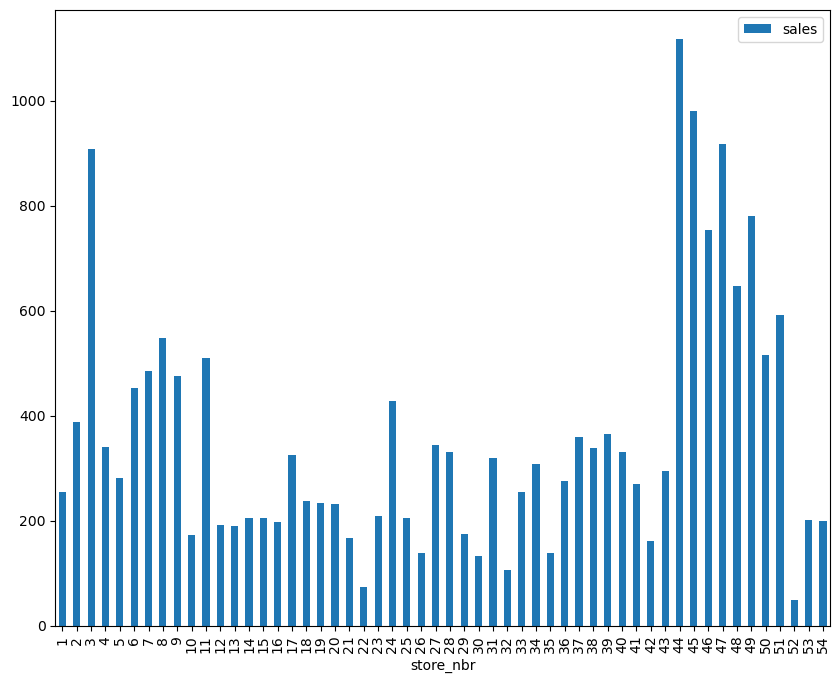

In [87]:
train.groupby('store_nbr').mean().plot(kind='bar', y='sales', secondary_y='onpromotion', figsize=(10,8))

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

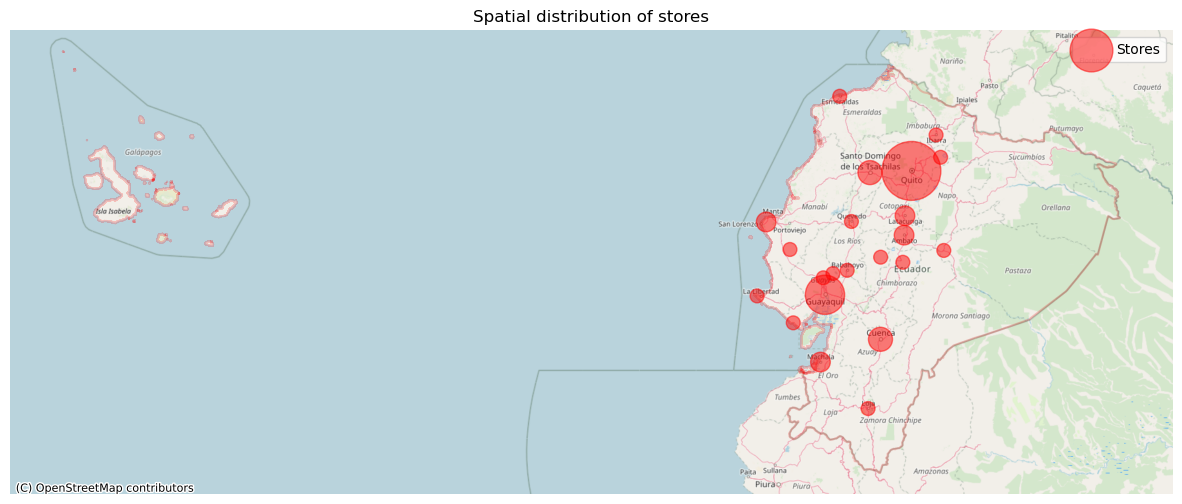

In [91]:
import geopandas as gpd
from geopy.geocoders import Nominatim
import swifter
import contextily as ctx

stores_df = pd.read_csv('data/store-sales-time-series-forecasting/stores.csv')
stores_per_city = stores_df.groupby('city')['store_nbr'].count().to_frame()
stores_per_city.rename(columns={'store_nbr': 'store_count'}, inplace=True)

geo_locator = Nominatim(user_agent='geoapiExercises')

def get_lat_long(city, state):
    location = geo_locator.geocode(f"{city}, {state}, Ecuador")
    return location.latitude ,location.longitude

stores_df['coords'] = stores_df.swifter.apply(lambda row: get_lat_long(city=row['city'], state=row['state']), axis=1)

stores_df = pd.merge(left=stores_per_city, right=stores_df[['city', 'coords']], left_on='city', right_on='city', how='left').drop_duplicates()
stores_df['scaled_counts'] = 100 * stores_df.store_count

gdf = gpd.GeoDataFrame(stores_df, geometrqy=gpd.points_from_xy(
    stores_df['coords'].apply(lambda x: x[1]),
    stores_df['coords'].apply(lambda x: x[0])
))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")
ecuador_shapefile = gpd.read_file('data/ecuador_boundaries_2015.json')
ecuador_shapefile.crs = "EPSG:4326"
ecuador_shapefile = ecuador_shapefile.to_crs("EPSG:3857")
ax = ecuador_shapefile.boundary.plot(figsize=(15, 14), color='red', alpha=0.2)
gdf.plot(ax=ax, markersize='scaled_counts', color='red', marker='o', label='Stores', alpha=0.5, )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.DE)

# for idx, row in gdf.iterrows():
#     ax.annotate(text=row['store_count'], xy=(row.geometry.x, row.geometry.y), xytext=(3, 3), fontsize=12, color='black')

ax.set_axis_off()
plt.legend()
plt.title("Spatial distribution of stores")
plt.show()



## Models

## Evaluation

## Conclusion